# The Data of Happiness  

#### by Jiehui Kwa, 3/20/2023

## Introduction

### Project Description 

The data I will be analyzing in my final project was gathered from the World Happiness Report (by the Gallup World Survey), which seeks to measure and make more concrete what has always been a very subjective and abstract, yet an infinitely integral aspect of human life -- happiness.  

**Data:**
[World Happiness Reports from 2005-2021](https://www.kaggle.com/datasets/jahaidulislam/world-happiness-report-2005-2021)

Happiness is something that all humans crave and desire. From Aristotle who espoused a eudaimonic and virtue-driven happiness, to Epicurus who advocated for hedonism and embracing feelings of pleasure, philosophers have long discussed and debated what happiness entails, and how we as humans can seek to achieve it. Nonetheless, it remains as enigmatic and relevant as ever, with mental health awareness on the rise and nascent fields like positive psychology dedicated to the study of happiness. In a way, it seems like there has been little to no progress made in the past centuries on how we can go about achieving this ever-elusive goal. Yet, perhaps it was this very sense of abstruseness that has driven my lifelong fascination with happiness, well-being, and the factors that influence it. 

The question then arises -- how can I approach a topic so abstract and nuanced, when it has even stumped humankind for centuries? Well, I believe the answer to that is, data. By looking at happiness through the lens of data, I hope to uncover and analyze patterns in happiness around the world, and hopefully gain a deeper insight into what affects happiness. 

###  Research Questions 

1) How do economic factors affect happiness?

2) How does one's social environment affect happiness? 



## Methods

The World Happiness Report data that I have used for this project was preprocessed, synthesized, and published by Jahaidul Islam on kaggle. First, I downloaded and imported the csv file as a pandas dataframe, which will later allow me to manipulate and analyze the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

hp_df = pd.read_csv('https://raw.githubusercontent.com/kjh97/DH-140/main/data/World%20Happiness%20Report%202005-2021.csv')

Then, I sorted the data according to the Happiness Score as it was previously sorted by country name.

In [4]:
hp_df.sort_values("Happiness Score", ascending = False, inplace=True)
hp_df.set_index('Country', inplace=True)

### How to measure happiness? 

**The six values measured in the World Happiness Report:**
* real GDP per capita
* social support
* healthy life expectancy
* freedom to make life choices
* generosity
* perceptions of corruption

#### Cleaning data
In the main dataframe of World Happiness Report data from 2005 to 2021, I removed the "Confidence in national government", "Positive affect", and "Negative affect" columns since they will not be utilized in my analysis. 

In [5]:
del hp_df['Positive affect'] 
del hp_df['Negative affect'] 

**Fig 1:** Summary description of statistics provided in dataframe

In [6]:
hp_df.describe()

,Year,Happiness Score,Log GDP per capita,Social support,Life expectancy,Freedom,Generosity,Perceptions of corruption,Confidence in national government
count,2089.000000,2089.000000,2063.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,1873.000000
mean,2013.727621,5.473747,9.377592,0.811542,63.180326,0.745462,0.000102,0.746474,0.483914
std,4.455614,1.115567,1.143843,0.118935,6.948546,0.140751,0.161082,0.186136,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.068769
25%,2010.000000,4.651972,8.471678,0.747664,58.965000,0.651689,-0.113172,0.689840,0.334808
50%,2014.000000,5.405246,9.462799,0.834770,64.980003,0.767357,-0.023366,0.801339,0.467046
75%,2017.000000,6.294282,10.347391,0.904682,68.362499,0.857677,0.090584,0.870789,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.993604


Fig 1 below provides a statistical summary of the different metrics that can be found in the data, such as 'Social support' and 'Life expectancy', which are factors that influence the 'Happiness Score'. The 'Happiness Score' refers to the average happiness rating assigned to a country based on a self-report well-being assessment known as the **Cantril Ladder**, which measures well-being on a scale of 1 to 10.

**Cantril Ladder:**
"Please imagine a ladder with steps numbered from zero at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time? On which step do you think you will stand about five years from now?"



### Grouping and organizing data

I created another dataframe that provided me with the 2021 World Happiness Report data (latest available data from the dataset), in order to help me analyze and visualize the latest data on happiness. Also, I removed the "Year" column as it is no longer relevant.

In [17]:
hp21_df = hp_df[hp_df['Year']==2021]
del hp21_df['Year']

Based on the data, the following two tables (Fig 2 & 3) represent the top 10 happiest countries in the world and the top 10 least happiest countries respectively.

**Fig 2:** Bar graph of the top 10 happiest countries in 2021

Text(0.5, 1.0, 'Top 10 Happiest Countries in 2021')

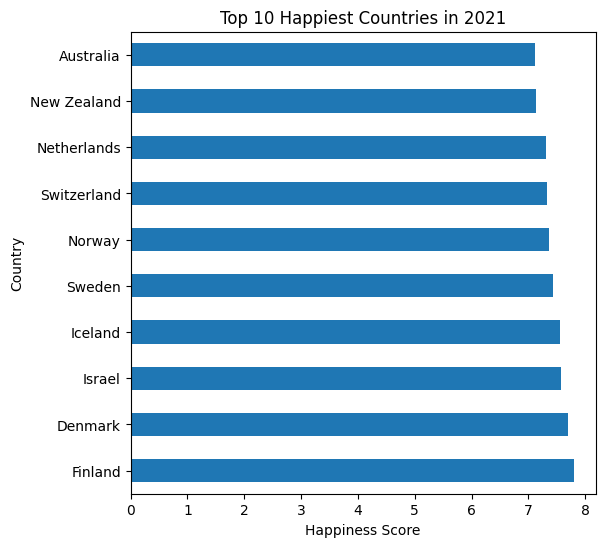

In [8]:
hp21_df['Happiness Score'].head(10).plot(xticks=np.arange(9), 
                               kind='barh', figsize= (6,6))
plt.xlabel("Happiness Score")
plt.title('Top 10 Happiest Countries in 2021')

**Fig 3:** Bar graph of the top 10 least happiest countries in 2021

Text(0.5, 1.0, 'Top 10 Least Happiest Countries in 2021')

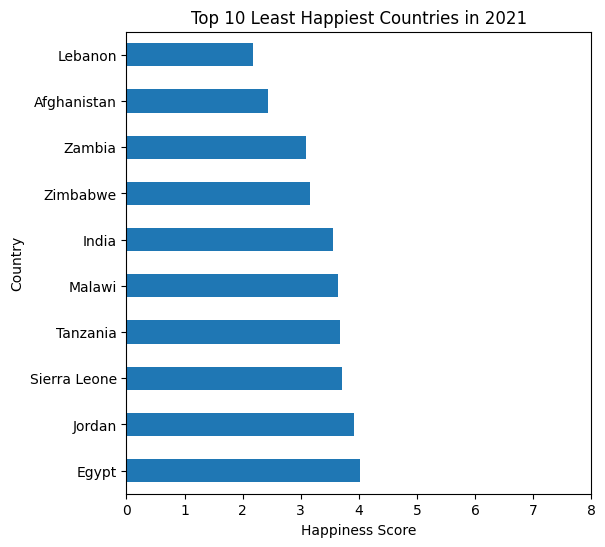

In [9]:
hp21_df['Happiness Score'].tail(10).plot(xticks=np.arange(9), 
                               kind='barh', figsize= (6,6))
plt.xlabel("Happiness Score")
plt.title('Top 10 Least Happiest Countries in 2021')

The following box plot shows the statistical distribution for Happiness Scores of countries in 2021, illustrating the minimum score, first quartile, median, third quartile, and maximum happiness score. Furthermore, it also shows the outliers, as can be seen by the two data points at the bottom of the graph, which based on the table above, represent the countries Lebanon and Afghanistan.   

**Fig 4:** Boxplot of Happiness Scores in 2021

Text(0.5, 1.0, 'Boxplot of Happiness Scores')

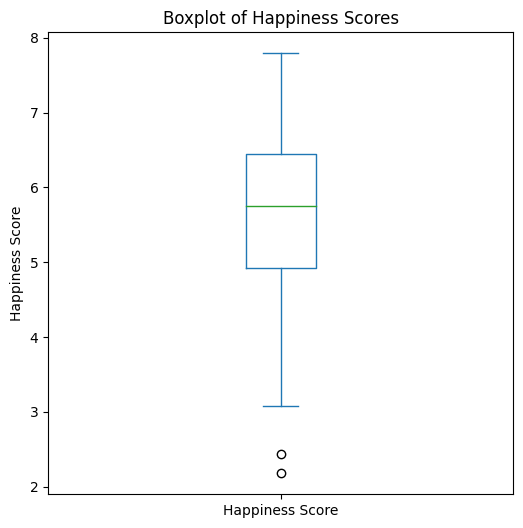

In [10]:
hp21_df['Happiness Score'].plot(kind = 'box', figsize = (6,6))
plt.ylabel("Happiness Score")
plt.title('Boxplot of Happiness Scores')

Meanwhile, the histogram provides a better understanding of how the happiness scores are distributed by frequency, giving a more visual representation of global happiness scores. This graph shows that there is a left-skewed distribution, which means most countries are concentrated on the right side of the graph with higher happiness scores. 

**Fig 5:** Histogram of Happiness Scores in 2021

Text(0.5, 1.0, 'Frequency distribution of Happiness Scores')

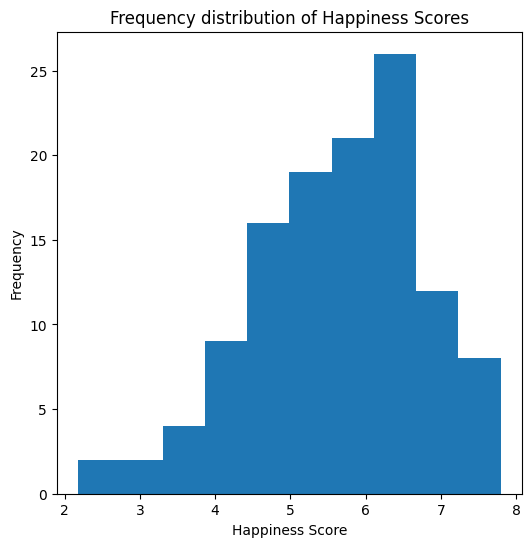

In [11]:
hp21_df['Happiness Score'].plot(kind = 'hist', figsize = (6,6))
plt.xlabel("Happiness Score")
plt.title('Frequency distribution of Happiness Scores')

## Results

The heat map displayed below highlights the correlation coefficient comparisons between each variable measured in the report. 

**Fig 6:** Heatmap of correlation coffecients between variables in the 2021 World Happiness Report 

Text(0.5, 1.0, 'Correlation between variables of 2021 World Happiness Report')

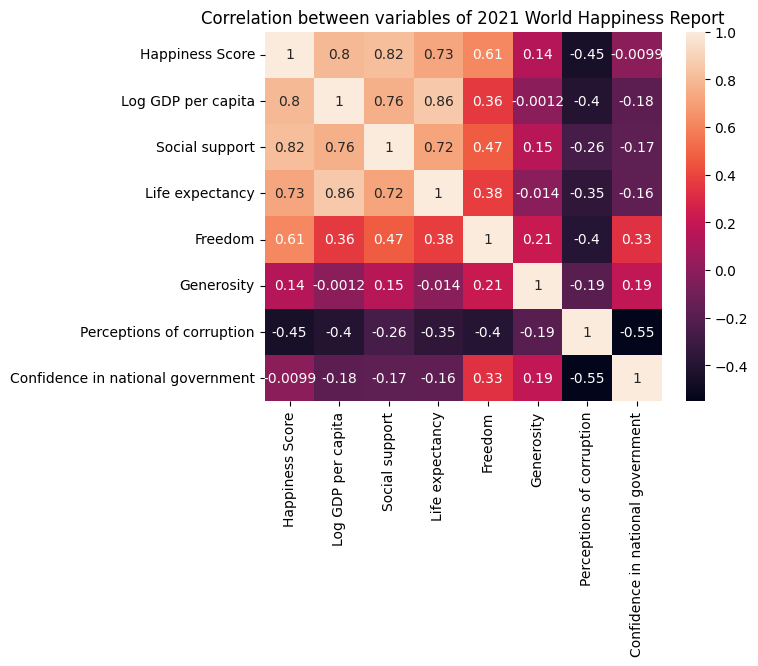

In [12]:
sns.heatmap(hp21_df.corr(),annot=True)
plt.title('Correlation between variables of 2021 World Happiness Report')

**Fig 7:** 
The boxplot below illustrates the statistical distribution of the GDP per capita across countries featured in the World Happiness Report.

Text(0.5, 1.0, 'Frequency distribution of GDP per capita (log) ')

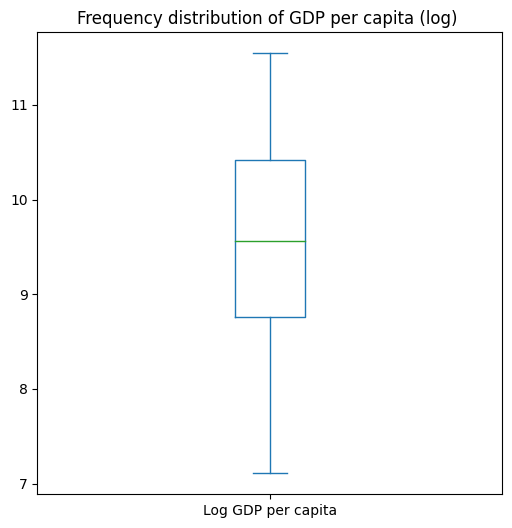

In [8]:
hp21_df['Log GDP per capita'].plot(kind = 'box', figsize = (6,6))
plt.title('Frequency distribution of GDP per capita (log) ')

**Fig 8:**
The scatterplot below illustrates the relationship between the GDP per capita and happiness scores for each country, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between GDP per capita and Happiness')

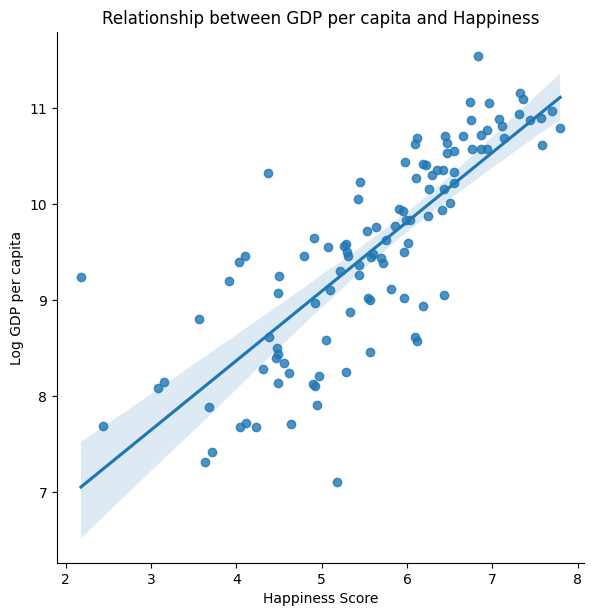

In [13]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Log GDP per capita'])
plt.title('Relationship between GDP per capita and Happiness')

**Fig 9:** This table shows the log GDP per capita of the 5 happiest countries in 2021. 

In [14]:
hp21_df[["Happiness Score", "Log GDP per capita"]].head()

,Happiness Score,Log GDP per capita
Country,,
Finland,7.794378,10.794553
Denmark,7.698747,10.972980
Israel,7.577528,10.616640
Iceland,7.564625,10.899748
Sweden,7.439280,10.873429


**Fig 10:** This table shows the log GDP per capita of the 5 least happiest countries in 2021. 

In [17]:
hp21_df[["Happiness Score", "Log GDP per capita"]].tail()

,Happiness Score,Log GDP per capita
Country,,
India,3.558254,8.807804
Zimbabwe,3.154578,8.153248
Zambia,3.082155,8.087629
Afghanistan,2.436034,7.695000
Lebanon,2.178809,9.243084


**Fig 11:**
The scatterplot below illustrates the relationship between life expectancy and happiness scores for each country, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Life Expectancy and Happiness')

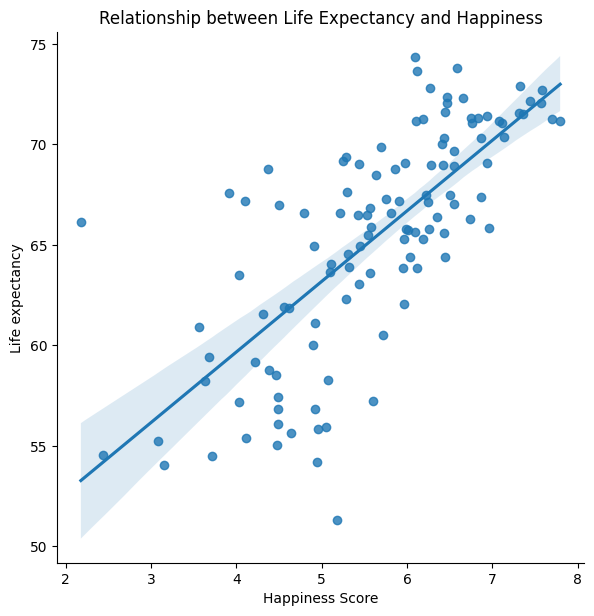

In [10]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Life expectancy'])
plt.title('Relationship between Life Expectancy and Happiness')

**Fig 12:** This scatterplot depicts the relationship between social support and happiness scores, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Social Support and Happiness')

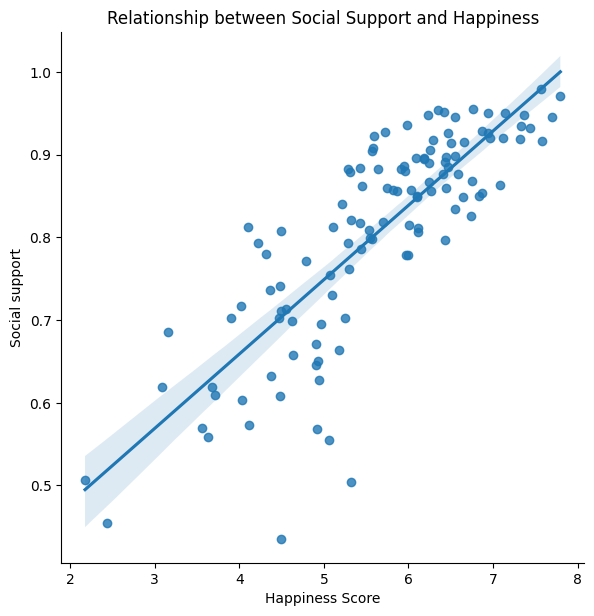

In [18]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Social support']) 
plt.title('Relationship between Social Support and Happiness')

**Fig 13:** This scatterplot depicts the relationship between the freedom to make choices and happiness scores, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Freedom and Happiness')

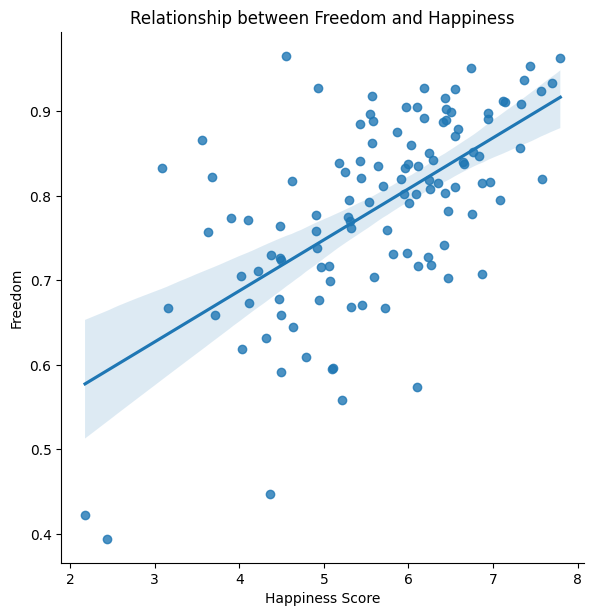

In [19]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Freedom'])
plt.title('Relationship between Freedom and Happiness')

**Fig 14:** This scatterplot depicts the relationship between perceptions of corruption and happiness scores, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Generosity and Happiness')

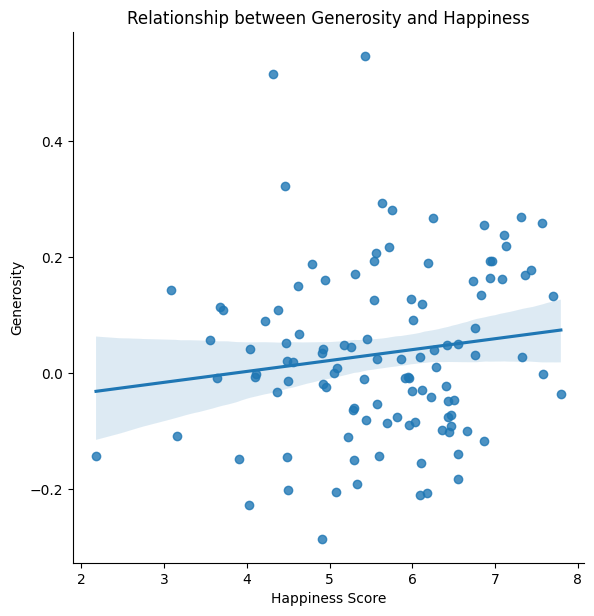

In [11]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Generosity'])
plt.title('Relationship between Generosity and Happiness')

**Fig 15:** This scatterplot depicts the relationship between perceptions of corruption and happiness scores, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Perceptions of Corruption and Happiness')

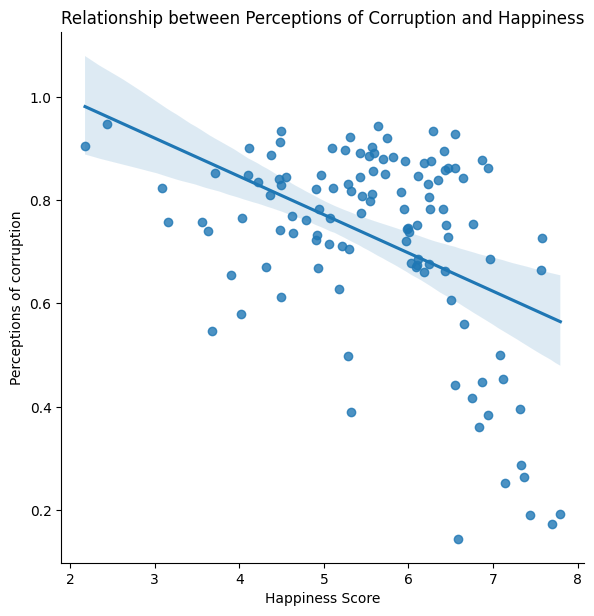

In [15]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Perceptions of corruption'])
plt.title('Relationship between Perceptions of Corruption and Happiness')

**Fig 16:** This scatterplot depicts the relationship between confidence in national government and happiness scores, and uses a best-fit line to draw an association between the two variables. 

Text(0.5, 1.0, 'Relationship between Confidence in National Government and Happiness')

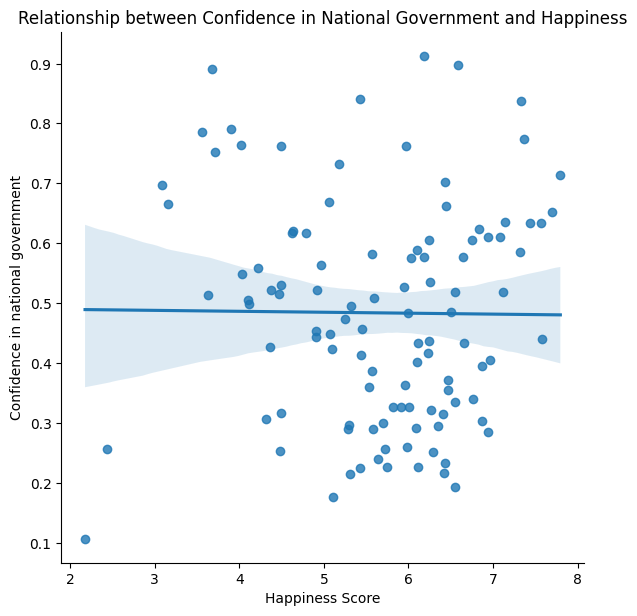

In [14]:
sns.pairplot(data=hp21_df, kind='reg', height = 6,
                  x_vars=['Happiness Score'],
                  y_vars=['Confidence in national government'])
plt.title('Relationship between Confidence in National Government and Happiness')

## Discussion

### Economy and Happiness

In this section, I will look at economic factors and their relationship with happiness. The key economic indicator measured in the World Happiness Report is the log GDP per capita, but I will also explore the role of life expectancy, which is significantly associated with economic factors, and their relationships with happiness.

**Relationship between GDP per capita and Happiness:**

One of the most common ways to measure a country's economic condition is through the gross domestic product (GDP) per capita, which calculates the average economic output of each individual within a nation.  

As can be seen from Fig 6 and 8, there is a strong positive correlation (r = 0.79) between GDP per capita and the happiness score. This indicates that economic output and wealth of a country has a positive relationship with the average happiness of its citizens and that the wealthier a country, the happier the people. This is likely the case since wealthier people have more purchasing power to improve their standard of living and quality of life, are more likely to be employed, and will be more able to afford basic neccessities and enjoy luxuries such as traveling, all of which will have a positive impact on happiness. 

In [15]:
hp21_df['Log GDP per capita'].mean()

9.533486973803571

In [16]:
hp21_df['Log GDP per capita'].median()

9.561124802

Also, as seen from Fig 7 and Fig 9, the top 5 happiest countries have a significantly higher log GDP per capita (mean = 10.83), than the mean (9.55) and median (9.56) of all countries in the report, demonstrating that the happiest countries are generally wealthier.

Fig 10 also illustrates that the 5 least happiest countries have a significantly lower log GDP per capita (mean = 8.4) than the mean (9.55) and median (9.56) of all countries, indicating that the least happiest countries are generally poorer. 

However, since this (GDP per capita vs happiness) is a purely correlational relationship, no directionality or causality can be established. Also, the log GDP per capita metric does not capture wealth inequality within countries, which is an important economic indicator since countries with large wealth inequality would likely have a high GDP per capita yet low happiness scores. The insufficiency of the log GDP per capita metric in predicting happiness is best exemplified by the case of Lebanon, who despite their relatively high log GDP per capita (9.24), have the lowest happiness score (2.18), suggesting that while GDP per capita is an important indicator of happiness, there are many other factors at play.

#### Relationship between Life Expectancy and Happiness: 

According to Fig 6, there is a very strong positive correlation between GDP per capita and life expectancy (r = 0.86), indicating that when countries have a higher GDP per capita, they tend to have a higher average life expectancy. This can be explained by the fact that people with higher incomes will likely have greater access to higher quality healthcare services, sanitation, nutritious food, and shelter, all of which play a part in improving overall health and life expectancy. 

Furthermore, as seen in Fig 6 and Fig 11, there is also a strong positive correlation between life expectancy and happiness (r = 0.73), suggesting that people would likely be happier if they lived in countries with a higher life expectancy. Again, this comes as no surprise since the aforementioned factors associated with higher life expectancy, such as healthcare and food, would likely play a role in improving quality of life and happiness overall. 

### Social Environment and Happiness

In this section, I will look at the relationship between one's social environment and happiness across countries. The social environment of a country can be represented by several of the metrics in the World Happiness Report, such as social support, freedom to make choices, generosity, perceptions of corruption, and confidence in national government. These factors all play a role in shaping the social environment of a country as they can influence the level of community, social, and institutional trust within a society. Then, I will examine how these factors correlate with happiness scores to determine if there the relationship between social environment and happiness. 

#### Relationship between Social Support and Happiness

Social support, as operationalized in the World Happiness Report, refers to having someone to count on in times of trouble. Having a strong social support system and having frequent interactions with them has been found to have positive effects on creating "feelings of love, care, self-esteem, and value", all of which have direct implications on instilling feelings of happiness (Moeini et al., 2018). This is supported by the data, as observed in Fig 6 & 12, where there is a strong positive correlation between social support and happiness (r = 0.72), which means that the greater the social support reported, the higher the happiness levels. 

#### Relationship between Freedom and Happiness

Freedom is measured by the self-reported level of freedom to choose what they can do with their lives. As seen in Fig 6 & 13, there is a strong positive correlation between freedom and happiness (r = 0.61), which means that the greater the freedom reported, the happier the people. When people have more freedom, they are more able to live life the way they want, which is likely to lead to a happier and more fulfilling life. Furthermore, research has found that humans have an innate need for freedom, with 'autonomy' being a primary psychological need (Rahman & Veenhoven, 2017). As such, if people perceived themselves to have low levels of freedom, it would almost be as if a primary need was taken away from them, and that would likely have adverse effects on happiness. 

#### Relationship between Generosity and Happiness

Generosity is operationalized by the number of times people have donated to charity in a month. Country with higher levels of generosity would likely have a more inclusive and trusting society where people value the needs of others. In fact, studies on generosity and happiness have found that people who give money to charity or help others were more likely to be happier than those who did not (Aknin et al., 2013). However, as seen from Fig 6 and Fig 14, generosity only has a weak positive correlation with happiness (r = 0.14), which means that societies with higher levels of generosity do not necessarily have higher happiness scores, going against literature and what one would expect. 

#### Relationship between Institutional Trust and Happiness

Institutional trust, based on the data provided, can be measured by perceptions of corruption and confidence in national government, such as the legal system and the police. Countries with higher levels of institutional trust more likely provide its citizens with a greater sense of security and stability, which can improve happiness. However, this is not consistently represented in the data gathered. 

As seen from Fig 6 & 15, there is a moderate negative correlation between perceptions of corruption and happiness (r = -0.45), which means that the lesser the perceived level of corruption in governments and businesses, there is generally higher levels of happiness. When perceived corruption is high, people have lower trust in institutions, which has further socioeconomic effects such as discouraging investment and political participation, which will have negative effects on well-being.

On the other hand, as displayed in Fig 6 & 16, there is no correlation between confidence in national government and happiness (r= -0.01), which means that levels of confidence in national government have no effect on happiness whatsoever. This is surprising as one would expect that with higher levels of confidence in national government, there would be greater trust in institutions' ability to address citizens' needs and tackling societal issues, which would lead to higher happiness. Also, past studies have found confidence in national government to be positively associated wiht happiness (Luhmann et al., 2012). As such, further exploration into the data has to be done to understand the reason for this aberration, such as errors in the dataset. 

## Citations

1. Jahaidul Islam. (2023). <i>World Happiness Report 2005-2021</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2927598

2. Moeini, B., Barati, M., Farhadian, M., & Ara, M. H. (2018). The Association between Social Support and Happiness among Elderly in Iran. Korean journal of family medicine, 39(4), 260–265. https://doi.org/10.4082/kjfm.17.0121

3. Abdur Rahman, A., &amp; Veenhoven, R. (2017). Freedom and happiness in nations: A research synthesis. Applied Research in Quality of Life, 13(2), 435–456. https://doi.org/10.1007/s11482-017-9543-6 

4. Aknin, L. B., Dunn, E. W., & Norton, M. I. (2013). Happiness runs in a circular motion: Evidence for a positive feedback loop between prosocial spending and happiness. Journal of Happiness Studies, 14(6), 1629-1641.

5. Luhmann, M., Hofmann, W., Eid, M., & Lucas, R. E. (2012). Subjective well-being and adaptation to life events: A meta-analysis. Journal of Personality and Social Psychology, 102(3), 592-615. https://doi.org/10.1037/a0025948